In [1]:
# Necessary libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from typing import Callable

In [2]:
eps = np.finfo(float).eps # Machine precision
plt.rcParams['figure.dpi'] = 120 # Plot size

Markdown macros:
$$
\newcommand{\abs}[1]{\left| #1 \right|}
\newcommand{\fun}[2]{#1 \! \left( #2 \right)}
$$

# (a)

In [3]:
def gamma_integrand(x:float, a:int) -> float:
    """Integrand for the integral representation of the Gamma function."""
    return (x**(a-1))*math.exp(-x)

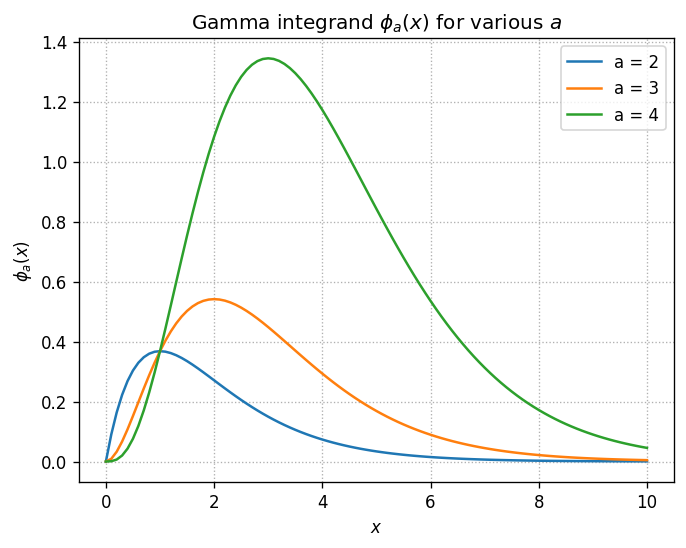

In [4]:
xs = np.linspace(0, 10, 101)
phis_2 = np.array([gamma_integrand(x, 2) for x in xs])
phis_3 = np.array([gamma_integrand(x, 3) for x in xs])
phis_4 = np.array([gamma_integrand(x, 4) for x in xs])
plt.plot(xs, phis_2, label='a = 2')
plt.plot(xs, phis_3, label='a = 3')
plt.plot(xs, phis_4, label='a = 4')
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi_{a}(x)$')
plt.grid(True, which='both', ls=':')
plt.legend()
plt.title(r"Gamma integrand $\phi_{a}(x)$ for various $a$")
plt.show()

# (b)

$\phi_{a}(x)$ is maximized at $x = a - 1$. Proof:
\begin{align*}
\frac{\mathrm{d} \phi_{a}(x)}{\mathrm{d} x}
&=
\left(a - 1\right) x^{a - 2} \exp(-x) - x^{a - 1} \exp(-x)
\\
&=
\left(\left(a - 1\right) x^{-1} - 1\right) x^{a-1} \exp(-x).
\end{align*}
$\exp(x) > 0$ for all real $x$
and $x^{a-1} > 0$ for all real, positive $x$,
so the derivative vanishes when
\begin{align*}
\left(a - 1\right) x^{-1} - 1
&=
0.
\end{align*}
The only solution is
\begin{align*}
x
&=
a - 1.
\end{align*}
We show that this is in fact a local maximum:
\begin{align*}
\left.\frac{\mathrm{d}^{2} \phi_{a}(x)}{\mathrm{d} x^{2}}\right|_{x = a - 1}
&=
\left.\left(\left(a - 1\right) \left(a - 2\right) x^{a - 3} - 2 \left(a - 1 \right) x^{a-2} \exp(-x) + x^{a - 1} \exp(-x)\right)\right|_{x = a - 1}
\\
&=
-\left(a - 1\right)^{a-2} \exp(1-a).
\end{align*}
Again, $\exp(1 - a) > 0$,
and $a - 1 > 0$ as long as $a > 1$,
so $\left(a - 1\right)^{a - 2} > 0$.
Thus,
the second derivative is negative at $x = a - 1$.

Finally,
we show that there are no maxima on the boundary.
\begin{align*}
\phi_{a}(0)
&=
0^{a-1}
=
0
<
\phi_{a}\!\left(a - 1\right)
\end{align*}
as long as $a > 1$,
and
\begin{align*}
\lim_{x \to \infty} \phi_{a}(x)
&=
0
<
\phi_{a}\!\left(a - 1\right)
\end{align*}
because $\exp(-x)$ shrinks more quickly than any polynomial grows.
Therefore $x = a - 1$ is the only maximum.

# (c)

The inverse of the $x \mapsto z$ transformation is
\begin{align*}
x\!\left(z\right)
&=
\frac{c z}{1 - z}.
\end{align*}
The transformed integrand is not simply $\phi_{a}\!\left(x\!\left(z\right)\right)$,
because the integration measure also transforms:
\begin{align*}
\phi_{a}\!\left(x\right) \, \mathrm{d}x
&=
\phi_{a}\!\left(x\!\left(z\right)\right) \frac{\mathrm{d} x}{\mathrm{d} z} \mathrm{d}z
\\
&=
c^{a} \frac{z^{a-1}}{\left(1 - z\right)^{a+1}} \exp(-\frac{c z}{1 - z}) \, \mathrm{d}z
\\
&:=
\tilde{\phi}_{a}\!\left(z\right) \, \mathrm{d}z.
\end{align*}
We can find the maximum of the new integrand the same way we did before. It's most convenient to write it as an exponential first:
\begin{align*}
\tilde{\phi}_{a}\!\left(z\right)
&=
\fun{\exp}{a \log(c) + (a-1) \log(z) - (a+1) \ln(1 - z) - \frac{c z}{1 - z}}.
\end{align*}
Then
\begin{align*}
\frac{\mathrm{d} \fun{\log}{\fun{\tilde{\phi}_{a}}{z}}}{\mathrm{d} z}
&=
\frac{a - 1}{z} + \frac{a + 1}{1 - z} - \frac{c}{\left(1 - z\right)^{2}}.
\end{align*}
At the point $z^{\ast}$ where this vanishes,
\begin{align*}
c
&=
\left(\frac{a - 1}{z^{\ast}} + \frac{a + 1}{1 - z^{\ast}}\right) \left(1 - z^{\ast}\right)^{2}.
\end{align*}
Requiring $z^{\ast} = 1/2$ yields
\begin{align*}
c
&=
a.
\end{align*}
Thus, the integrand is
\begin{align*}
\fun{\tilde{\phi}_{a}}{z}
&=
\fun{\exp}{a \log(a) + \left(a - 1\right) \log(z) - \left(a + 1\right) \log(1 - z) - \frac{a z}{1 - z}}.
\end{align*}

In [5]:
def phi_log(z:float, a:float) -> float:
    # Ensure a > 1
    if a <= 1:
        raise ValueError("Require a > 1.")
    # Ensure 0 <= z <= 1
    if not(0 < z < 1):
        raise ValueError("Require 0 < z < 1.")

    return a*math.log(a) + (a-1.0)*math.log(z) - (a+1.0)*math.log1p(-z) - (a*z)/(1.0-z)

In [6]:
def gamma_integrand_z(z:float, a:float) -> float:
    if z == 0 or z == 1:
        return 0
    return math.exp(phi_log(z, a))

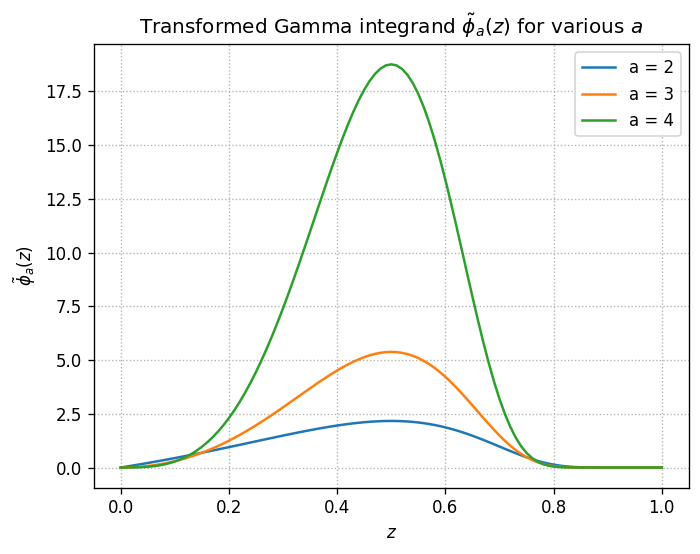

In [7]:
zs = np.linspace(0, 1, 101)
phis_2_z = np.array([gamma_integrand_z(z, 2) for z in zs])
phis_3_z = np.array([gamma_integrand_z(z, 3) for z in zs])
phis_4_z = np.array([gamma_integrand_z(z, 4) for z in zs])
plt.plot(zs, phis_2_z, label='a = 2')
plt.plot(zs, phis_3_z, label='a = 3')
plt.plot(zs, phis_4_z, label='a = 4')
plt.xlabel(r'$z$')
plt.ylabel(r'$\tilde{\phi}_{a}(z)$')
plt.grid(True, which='both', ls=':')
plt.legend()
plt.title(r"Transformed Gamma integrand $\tilde{\phi}_{a}(z)$ for various $a$")
plt.show()

# (d)

For the integral, we use the Gaussian quadrature method from Problem 4.

Gaussian quadrature amounts to computing a sum of exponentials:
\begin{align*}
I
&=
\sum_{i = 1}^{n} \fun{\exp}{\fun{\log}{w_{i}} + \fun{\log}{\fun{\tilde{\phi}_{a}}{z_{i}}}}
\\
&:=
\sum_{i=1}^{n} \fun{\exp}{L_{i}}.
\end{align*}
To avoid roundoff error in the sum, we can pull out an overall factor:
\begin{align*}
S
&=
\exp(M) \sum_{i} \exp(L_{i} - M),
\end{align*}
where $M = \max_{i} L_{i}$, so that each term in the sum is in $\left(0,1\right]$.

In [8]:
def GL_gamma(
    a: float,
    n : int
) -> float:
    """
    Approximates Gamma(a) by Gaussian quadrature.

    Inputs:
    a : float                      # Argument of Gamma
    n : int                        # Order of quadrature

    Outputs:
    gamma : float                  # Integral estimate
    """
    
    if a <= 1:
        raise ValueError("Require a > 1.")
    if n < 1:
        raise ValueError("Require n >= 1.")
    
    # Nodes and weights on [-1,1]
    zs, ws = np.polynomial.legendre.leggauss(n)
    
    # Map [-1,1] to [0, 1]
    zs = 0.5 + 0.5 * zs
    ws = 0.5 * ws

    # Compute the integral
    Ls = np.log(ws) + a*math.log(a) + (a-1.0)*np.log(zs) - (a+1.0)*np.log1p(-zs) - (a*zs)/(1.0-zs)
    M = float(np.max(Ls))
    terms = np.exp(Ls - M)

    return math.exp(M)*math.fsum(terms)

In [9]:
amin = 2
amax = 20
n = 32
args = np.linspace(amin, amax, 101)
gammas_est = np.array([GL_gamma(arg, n) for arg in args])

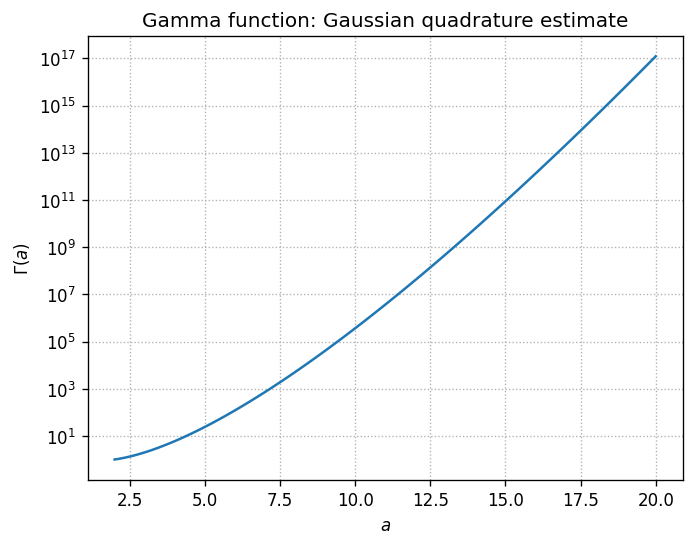

In [10]:
plt.semilogy(args, gammas_est)
plt.xlabel(r"$a$")
plt.ylabel(r"$\Gamma\left(a\right)$")
plt.title("Gamma function: Gaussian quadrature estimate")
plt.grid(True, which='both', ls=':')
plt.show()

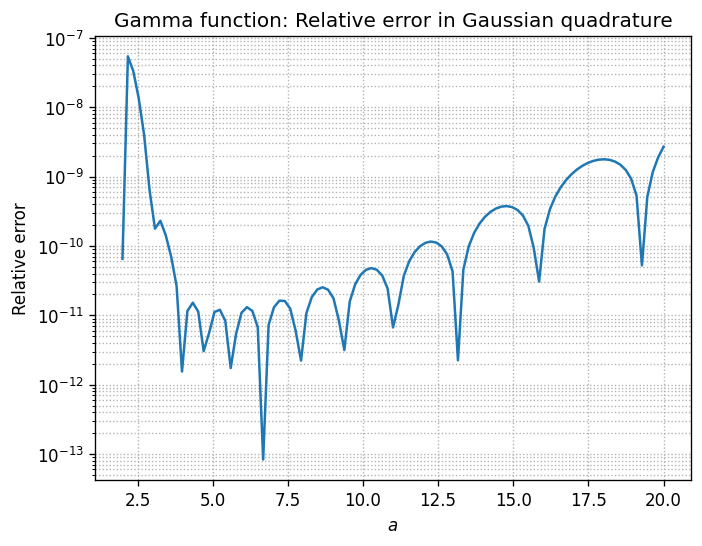

In [11]:
gammas_true = np.array([math.gamma(arg) for arg in args])
errors = abs(gammas_est - gammas_true) / abs(gammas_true)
plt.semilogy(args, errors)
plt.xlabel(r"$a$")
plt.ylabel("Relative error")
plt.title("Gamma function: Relative error in Gaussian quadrature")
plt.grid(True, which='both', ls=':')
plt.show()